<a href="https://colab.research.google.com/github/jronald88/K-means-Project/blob/main/src/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install -r "/workspaces/K-means-Project/requirements.txt"

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [96]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [97]:
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [98]:
df_clean = df.drop(['HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal'], axis = 1)
df_clean.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Train Test Split


In [99]:
X_train, X_test = train_test_split(df_clean, test_size=0.2, random_state=42)

In [100]:
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [101]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


In [102]:
model = KMeans(n_clusters=6,n_init = "auto", random_state=42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [103]:
y_train = list(model.labels_)


In [104]:
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


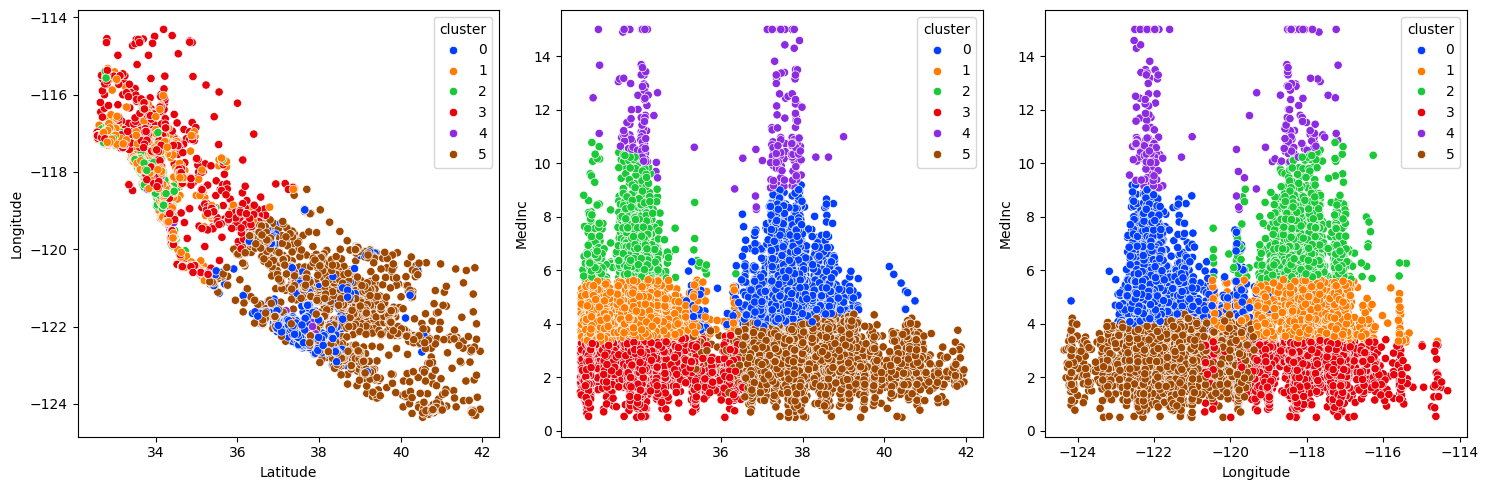

In [105]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright")


plt.tight_layout()

plt.show()

In [106]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


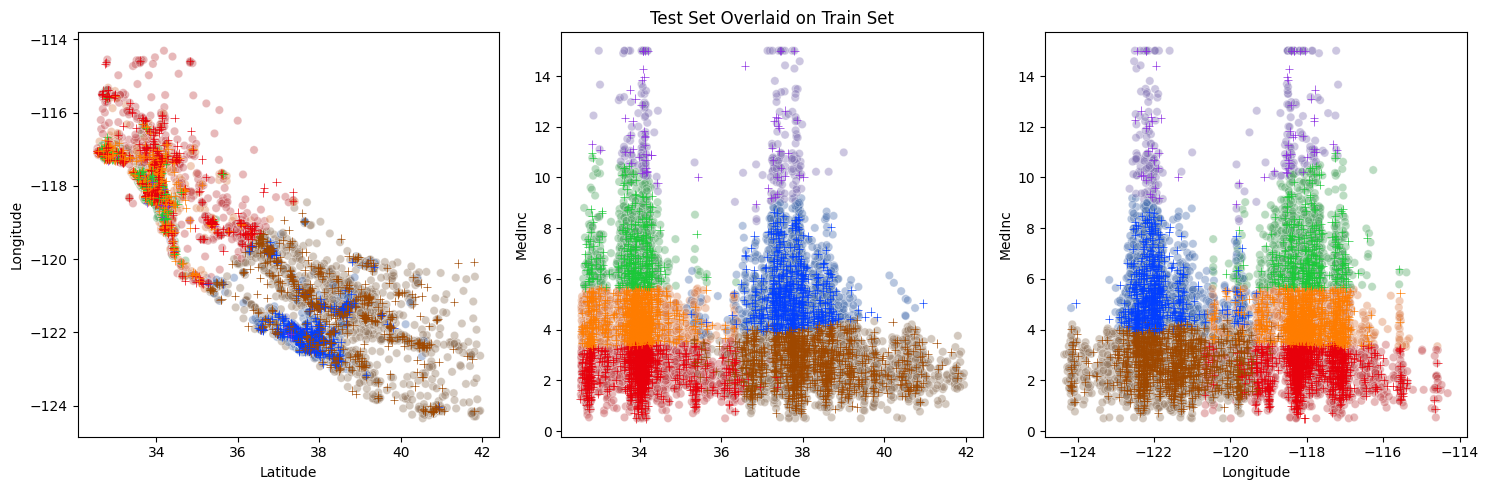

In [107]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))
model.cluster_centers_

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.4)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.4)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.4)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
"""
sns.scatterplot(ax=axis[0], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[1], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[2], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
"""
axis[1].set_title("Test Set Overlaid on Train Set")
plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

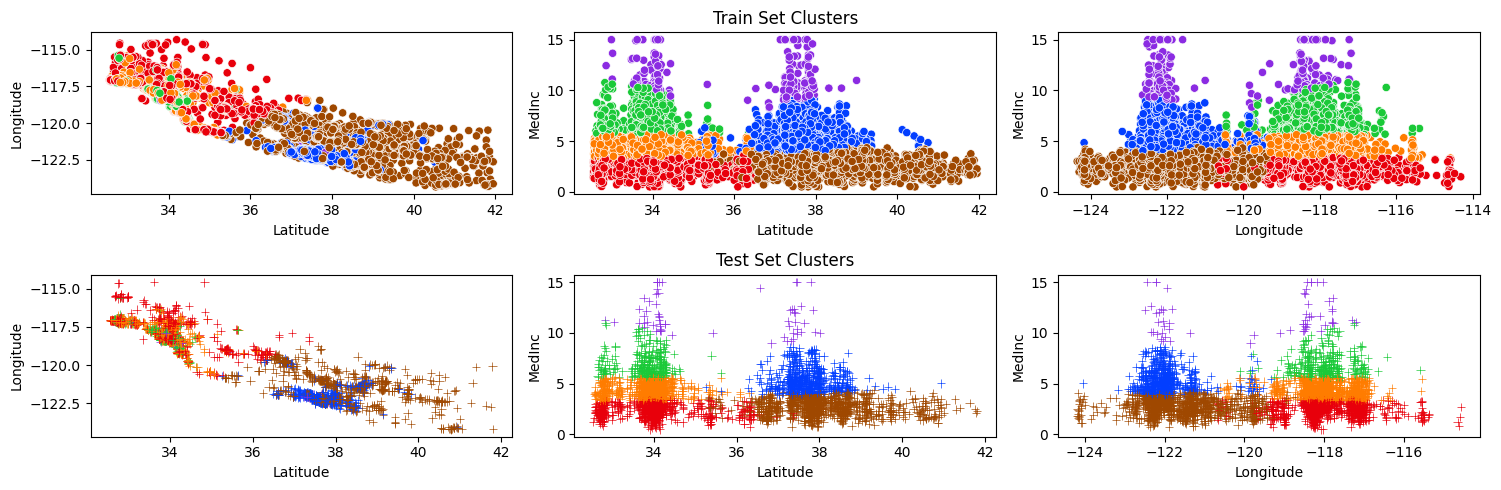

In [108]:
fig, axis = plt.subplots(2, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0,0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[0,1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[0,2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright")

cluster_centers = model.cluster_centers_
# Plot the cluster centers using Seaborn's scatterplot function
"""
sns.scatterplot(ax=axis[0, 0], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[0, 1], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[0, 2], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
"""

sns.scatterplot(ax = axis[1,0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1,1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1,2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
"""
sns.scatterplot(ax=axis[1, 0], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[1, 1], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[1, 2], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
"""
axis[0,1].set_title("Train Set Clusters")
axis[1,1].set_title("Test Set Clusters")

plt.tight_layout()

for ax in axis.flat:
    ax.legend([],[], frameon=False)

plt.show()

Supervised Machine Learning


In [109]:
model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

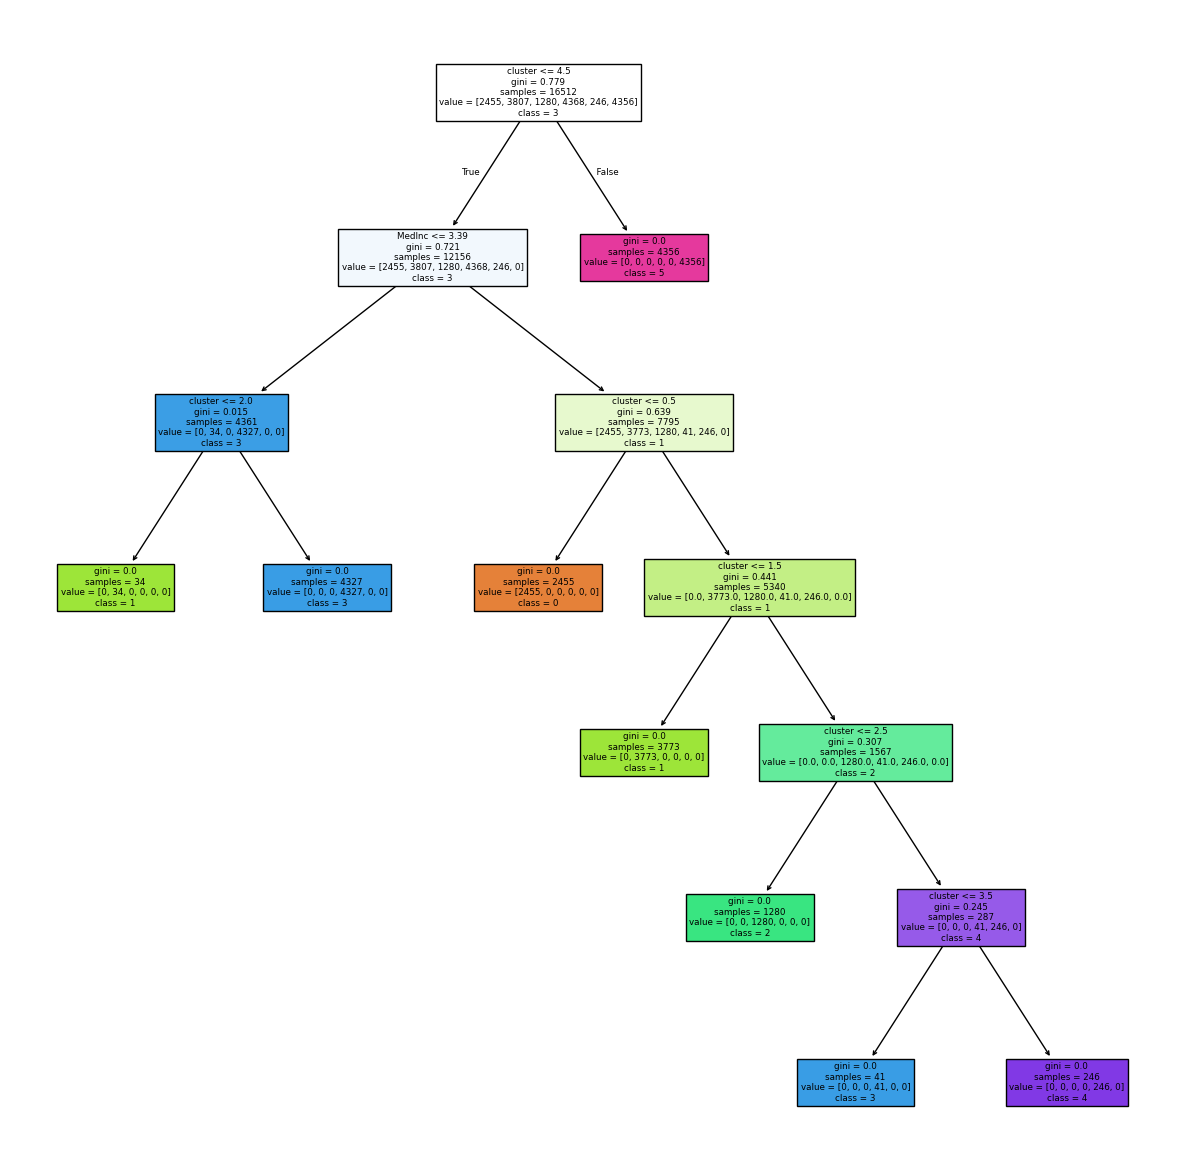

In [110]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [111]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [112]:
print(accuracy_score(y_test, y_pred))

1.0


In [113]:
print(f1_score(y_test, y_pred, average = "weighted"))

1.0


In [114]:
#Random Search HyperParameters
parameters = {
              'n_clusters':[4,5,6,7,8,9,10],
              'n_init':[2,3,4,5,6,7,8,9,10],
              'algorithm':['lloyd', 'elkan'],
              'copy_x':[True,False]
             }
scorer = make_scorer(f1_score)

In [115]:
random = RandomizedSearchCV(model, parameters, scoring=scorer)


In [116]:
# Fit the model to your data
random_out = random.fit(X_train, y_train)
random_out

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-pa

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-pa

RandomizedSearchCV(estimator=KMeans(n_clusters=6, random_state=42),
                   param_distributions={'algorithm': ['lloyd', 'elkan'],
                                        'copy_x': [True, False],
                                        'n_clusters': [4, 5, 6, 7, 8, 9, 10],
                                        'n_init': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [117]:
best = random_out.best_estimator_
best

KMeans(algorithm='elkan', n_clusters=10, n_init=8, random_state=42)

In [118]:
class_train_pred = best.predict(X_train)
class_test_pred = best.predict(X_test)

In [135]:

print('The Training F1 Score is', f1_score(class_train_pred, y_train, average='weighted'))
print('The Testing F1 Score is', f1_score(class_test_pred, y_test, average='weighted'))

The Training F1 Score is 0.2769427327199727
The Testing F1 Score is 0.2570564919835137


In [137]:
print('The Accuracy Score is', accuracy_score(class_train_pred, y_train))
print('The Accuracy Score is', accuracy_score(class_test_pred, y_test))

The Accuracy Score is 0.22619912790697674
The Accuracy Score is 0.20833333333333334


Random Forest Model

In [119]:
RF_model = RandomForestClassifier(random_state = 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

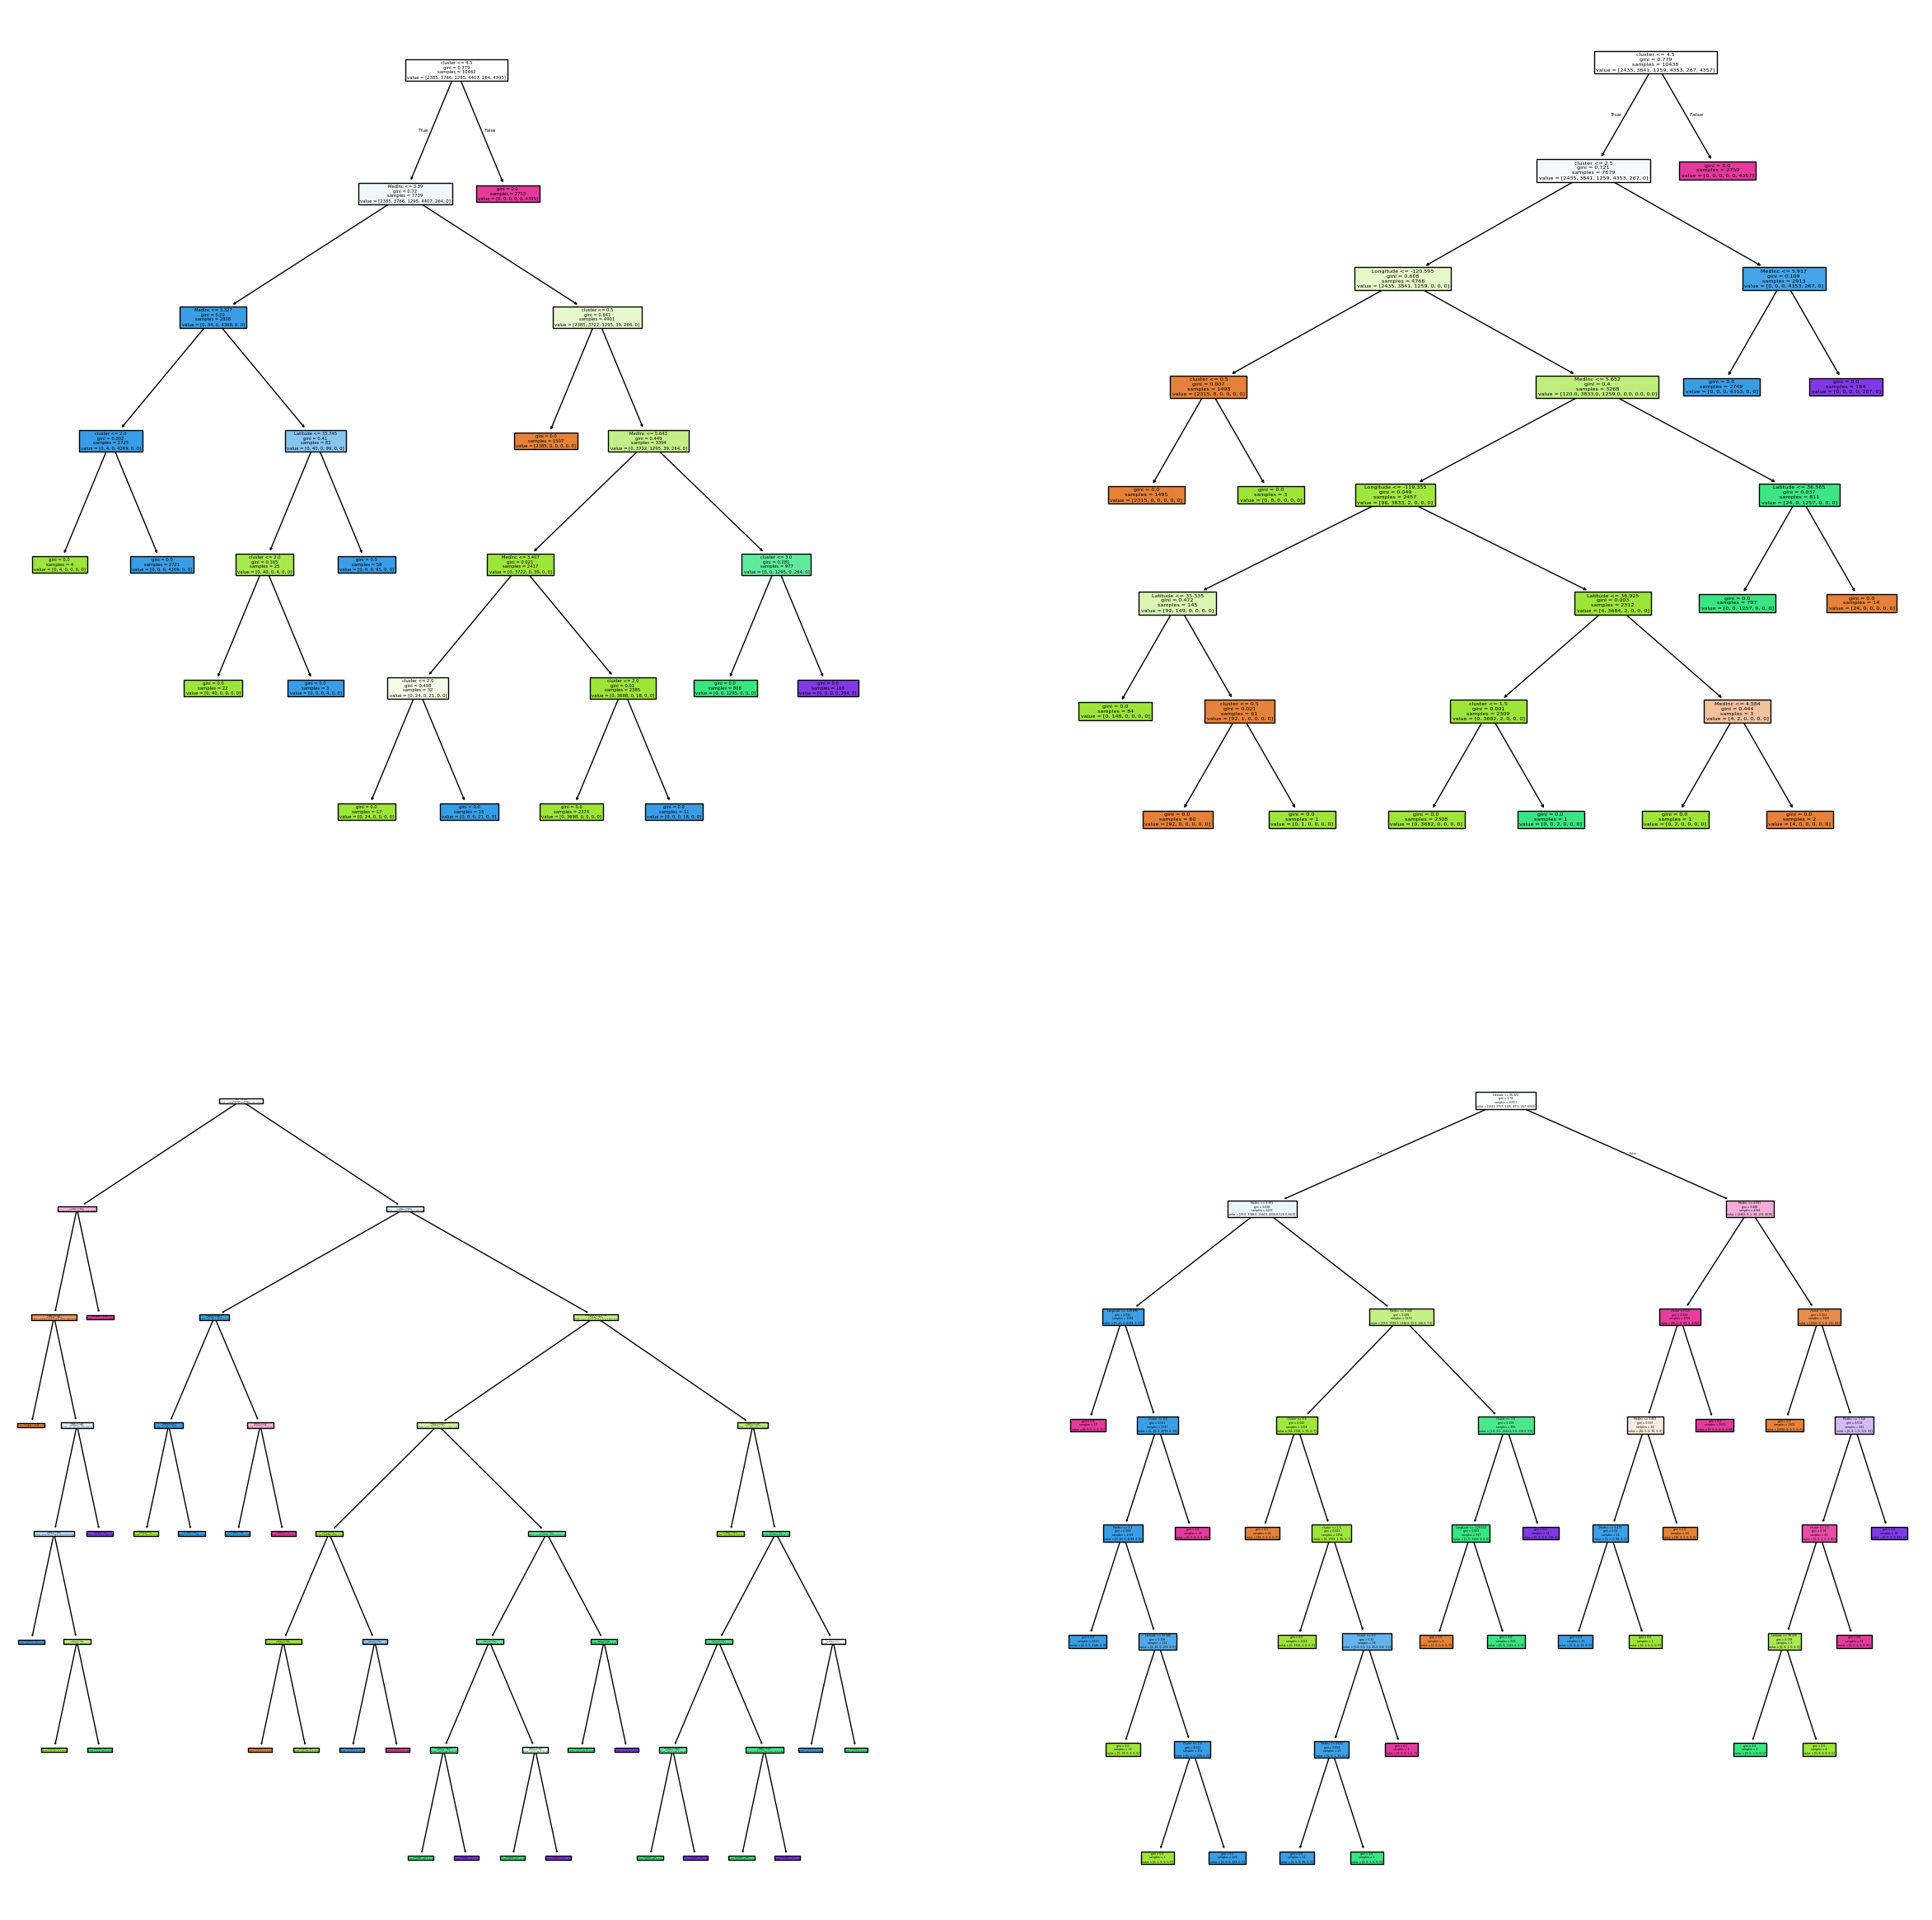

In [120]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(RF_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), filled = True)
tree.plot_tree(RF_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), filled = True)
tree.plot_tree(RF_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), filled = True)
tree.plot_tree(RF_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), filled = True)

plt.show()


In [121]:
y_train_pred = RF_model.predict(X_train)
y_train_pred

array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [122]:
accuracy_score(y_train, y_train_pred)


1.0

In [123]:
accuracy_score(y_test, y_pred)


1.0

In [124]:
print(f1_score(y_train, y_train_pred, average="weighted"))


1.0


In [125]:
print(f1_score(y_test, y_pred, average = 'weighted'))


1.0


In [126]:
#Random Search HyperParameters
parameters = {
              'n_clusters':[4,5,6,7,8,9,10],
              'n_init':[2,3,4,5,6,7,8,9,10],
              'algorithm':['lloyd', 'elkan'],
              'copy_x':[True,False]
             }
scorer = make_scorer(f1_score)

In [127]:
random = RandomizedSearchCV(model, parameters, scoring=scorer)
random

RandomizedSearchCV(estimator=KMeans(n_clusters=6, random_state=42),
                   param_distributions={'algorithm': ['lloyd', 'elkan'],
                                        'copy_x': [True, False],
                                        'n_clusters': [4, 5, 6, 7, 8, 9, 10],
                                        'n_init': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [128]:
# Fit the model to your data
random_out = random.fit(X_train, y_train)
random_out

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-pa

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-pa

RandomizedSearchCV(estimator=KMeans(n_clusters=6, random_state=42),
                   param_distributions={'algorithm': ['lloyd', 'elkan'],
                                        'copy_x': [True, False],
                                        'n_clusters': [4, 5, 6, 7, 8, 9, 10],
                                        'n_init': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [129]:
best = random_out.best_estimator_
best

KMeans(copy_x=False, n_clusters=4, n_init=5, random_state=42)

In [130]:
class_train_pred = best.predict(X_train)
class_test_pred = best.predict(X_test)


In [131]:
print('The Training F1 Score is', f1_score(class_train_pred, y_train, average = 'weighted'))
print('The Testing F1 Score is', f1_score(class_test_pred, y_test, average = 'weighted'))

The Training F1 Score is 0.2769427327199727
The Testing F1 Score is 0.2570564919835137


In [132]:
print('The Accuracy Score is', accuracy_score(class_train_pred, y_train))
print('The Accuracy Score is', accuracy_score(class_test_pred, y_test))

The Accuracy Score is 0.22619912790697674
The Accuracy Score is 0.20833333333333334
